In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import io    
from skimage.filters import median

from scipy.stats import gaussian_kde  # Library to create the histogram of noise

# np.set_printoptions(threshold=sys.maxsize)          # نمایش کامل ماتریس

**Convolution Function**

In [ ]:

# def convolution(img, window):
#   h, w= img.shape
#   new_img = np.zeros((h,w), dtype= np.uint8)
#   for i in range(1, h-1):
#     for j in range(1, w-1):
#       g= img[i-1][j-1]* window[0,0] + img[i-1][j]* window[0,1] + img[i-1][j+1]* window[0,2] +\
#       img[i][j-1]* window[1,0] + img[i][j]* window[1,1] + img[i][j+1]* window[1,2] +\
#       img[i+1][j-1]* window[2,0] + img[i+1][j]* window[2,1] + img[i+1][j+1]* window[2,2] 

#       if g > 255:
#        g = 255
#       elif g < 0:
#         g = 0
#       new_img[i][j] = g
#   return new_img

In [ ]:
def convolution(img, kernel):

    h, w = kernel.shape
    #Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # np.flipud: Reverse the order of elements along axis 0 (up/down)
    # np.fliplr: Reverse the order of elements along axis 1 (left/right)
    
    
    #convolution output
    output= np.zeros_like(img)
    # Add zero padding to the input image
    img_padded = np.zeros((img.shape[0]+(h-1) , img.shape[1] + (w-1)))

    size_h = (h-1)//2
    size_w = (w-1)//2
    img_padded[size_h:-size_h, size_w:-size_w] = img     
    
    
    
    # Loop over pixel of the image
    for x in range(img.shape[1]):
        for y in range(img.shape[0]):
            #element-wise multiplication of the kernel and the image
            output[y, x]= (kernel * img_padded[y : y+h, x : x+h]).sum()
    
    return output


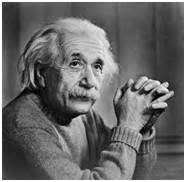

In [ ]:
img = cv.imread('/content/drive/MyDrive/image_notebooks/einstein.jpg', 0)
cv2_imshow(img)

***Salt and Pepper Noise***

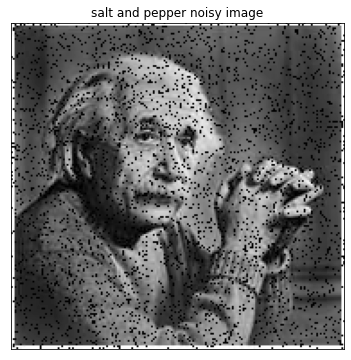

In [ ]:
x, y= img.shape
g= np.zeros((x, y), dtype= np.float32)

pepper = 0.05
salt= 1-pepper
for i in range(x):
  for j in range(y):
    rdn = np.random.random()
    if rdn < pepper:
      g[i][j] = 0
    elif rdn > salt:
      g[i][j] = 1
    else:
      g[i][j]= img[i][j]

sp_img= g
plt.figure(figsize=(6, 6))
plt.imshow(sp_img, cmap='gray')
plt.title('salt and pepper noisy image');
plt.xticks([]), plt.yticks([]);

**Gaussian Noise**

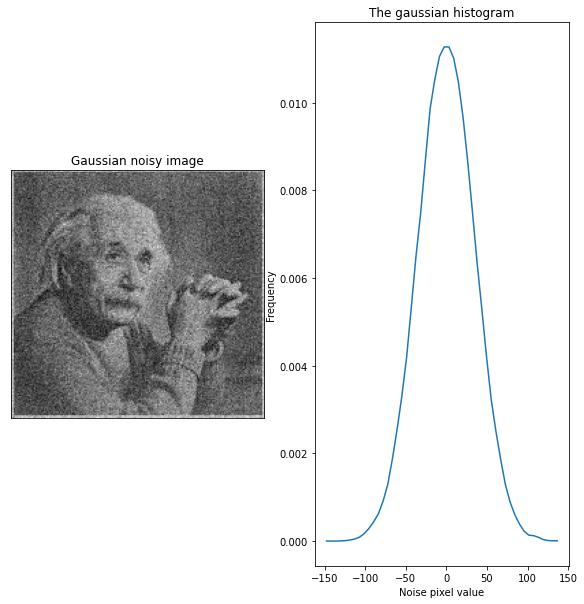

In [ ]:

mean = 0
var= 1200
    
norm_img= img/255    # to normalize the image by dividing with the max number


sigma = np.sqrt(var)    #std

#create the gaussian noise
noise = np.random.normal(mean,sigma,norm_img.shape)
noisy_img= noise + img


# plot histogram of the noise
x, y= norm_img.shape
kde = gaussian_kde(noise.reshape(int(x*y)))
dist_space= np.linspace(np.min(noise), np.max(noise))

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(noisy_img, cmap='gray')
plt.title('Gaussian noisy image')
plt.xticks([]), plt.yticks([]);

plt.subplot(122)
plt.plot(dist_space, kde(dist_space))
plt.xlabel('Noise pixel value')
plt.ylabel('Frequency')
plt.title('The gaussian histogram')

plt.show()




# **Smoothing Filters**

***Box Filter 3*3***

In [ ]:
box_kernel3 = np.ones((3,3),np.float32)/9

In [ ]:
box_kernel5 = np.ones((5,5),np.float32)/25

In [ ]:
box_filter3= convolution(img, box_kernel3)

In [ ]:
box_filter5= convolution(img, box_kernel5)

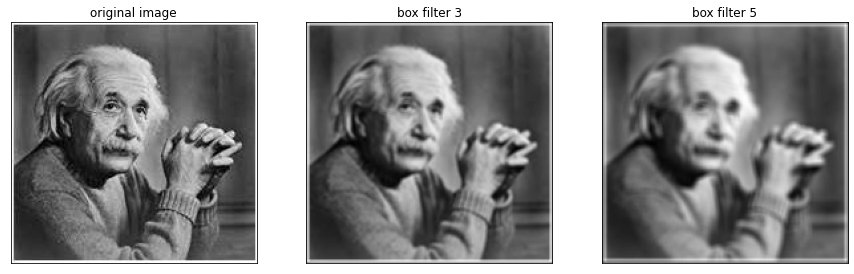

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]);

plt.subplot(132)
plt.imshow(box_filter3, cmap='gray')
plt.title('box filter 3');
plt.xticks([]), plt.yticks([]);

plt.subplot(133)
plt.imshow(box_filter5, cmap='gray')
plt.title('box filter 5');
plt.xticks([]), plt.yticks([]);

In [ ]:
sp_box_filter3= convolution(sp_img, box_kernel3)

In [ ]:
sp_box_filter5= convolution(sp_img, box_kernel5)

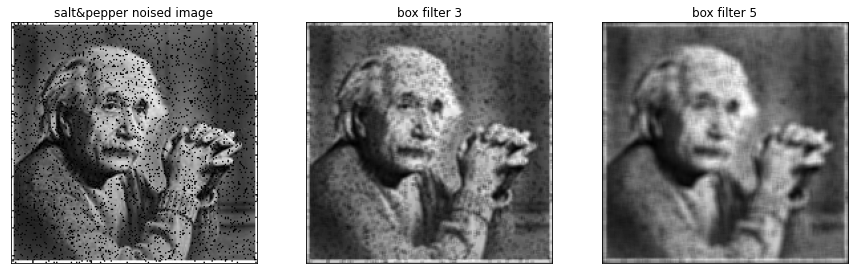

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(131)
plt.imshow(sp_img, cmap='gray')
plt.title('salt&pepper noised image')
plt.xticks([]), plt.yticks([]);

plt.subplot(132)
plt.imshow(sp_box_filter3, cmap='gray')
plt.title('box filter 3');
plt.xticks([]), plt.yticks([]);

plt.subplot(133)
plt.imshow(sp_box_filter5, cmap='gray')
plt.title('box filter 5');
plt.xticks([]), plt.yticks([]);

Box filter on Gaussian noise

In [ ]:
box_on_gaussian3= convolution(noisy_img, box_kernel3)

In [ ]:
box_on_gaussian5= convolution(noisy_img, box_kernel5)

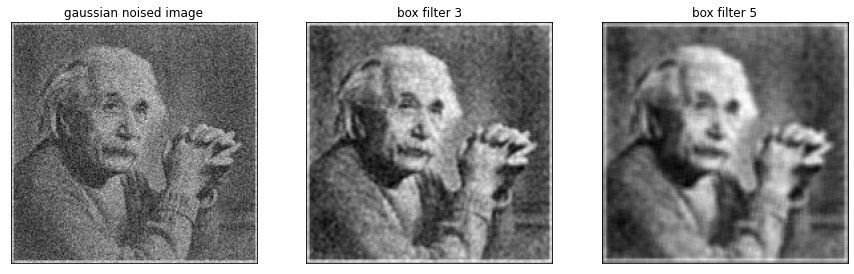

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(131)
plt.imshow(noisy_img, cmap='gray')
plt.title('gaussian noised image')
plt.xticks([]), plt.yticks([]);

plt.subplot(132)
plt.imshow(box_on_gaussian3, cmap='gray')
plt.title('box filter 3');
plt.xticks([]), plt.yticks([]);

plt.subplot(133)
plt.imshow(box_on_gaussian5, cmap='gray')
plt.title('box filter 5');
plt.xticks([]), plt.yticks([]);

**Weighted Average Filter**

In [ ]:
weighted_kernel = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]])/16

In [ ]:
weighted_filter = convolution(img, weighted_kernel)



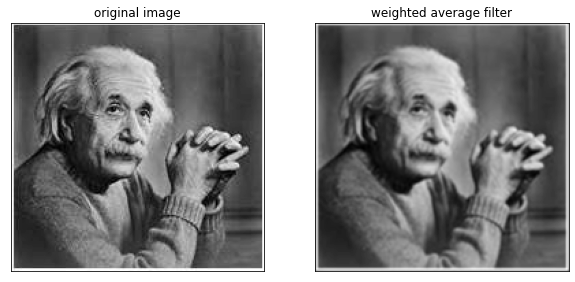

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]);

plt.subplot(122)
plt.imshow(weighted_filter, cmap='gray')
plt.title('weighted average filter');
plt.xticks([]), plt.yticks([]);


weighted average filter on salt and pepper noisy image

In [ ]:
noised_weighted_filter = convolution(sp_img, weighted_kernel)

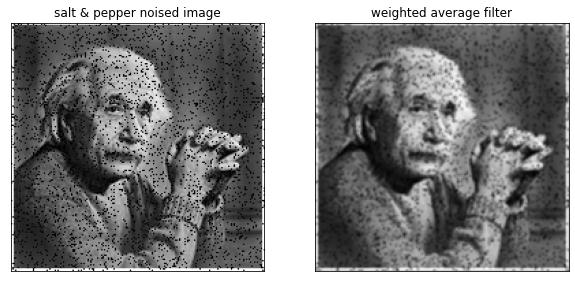

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(sp_img, cmap='gray')
plt.title('salt & pepper noised image')
plt.xticks([]), plt.yticks([]);

plt.subplot(122)
plt.imshow(noised_weighted_filter, cmap='gray')
plt.title('weighted average filter');
plt.xticks([]), plt.yticks([]);


weighted average filter on Gaussian noisy image

In [ ]:
gauss_weighted_filter = convolution(noisy_img, weighted_kernel)

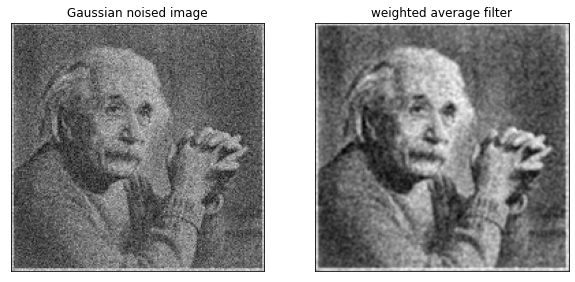

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(noisy_img, cmap='gray')
plt.title('Gaussian noised image')
plt.xticks([]), plt.yticks([]);

plt.subplot(122)
plt.imshow(gauss_weighted_filter, cmap='gray')
plt.title('weighted average filter');
plt.xticks([]), plt.yticks([]);

***Median Filter***

Median filter on salt and pepper noisy image

In [ ]:
sp_median3 = cv.medianBlur(sp_img, 3)
sp_median5 = cv.medianBlur(sp_img, 5)

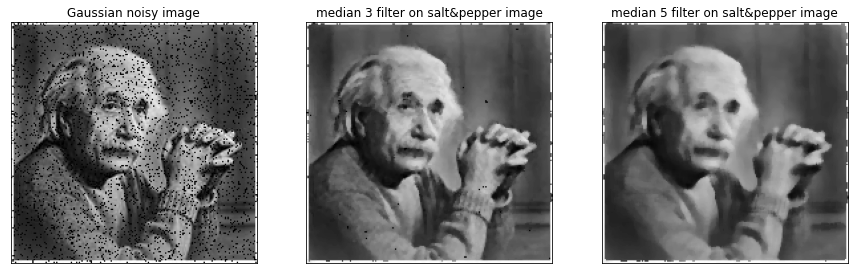

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(131)
plt.imshow(sp_img, cmap='gray')
plt.title('Gaussian noisy image')
plt.xticks([]), plt.yticks([]);

plt.subplot(132)
plt.imshow(sp_median3, cmap='gray');
plt.title('median 3 filter on salt&pepper image')
plt.xticks([]), plt.yticks([]);

plt.subplot(133)
plt.imshow(sp_median5, cmap='gray');
plt.title('median 5 filter on salt&pepper image')
plt.xticks([]), plt.yticks([]);

Median Filter on Gaussian noisy image

In [ ]:
# gauss_median3 = cv.medianBlur(noisy_img, 3)

In [ ]:
# plt.figure(figsize=(10, 10))

# plt.subplot(121)
# plt.imshow(noisy_img, cmap='gray')
# plt.title('Gaussian noisy image')
# plt.xticks([]), plt.yticks([]);

# plt.subplot(122)
# plt.imshow(gauss_median3, cmap='gray');
# plt.title('median 3 filter')
# plt.xticks([]), plt.yticks([]);

***Gaussian Filter***


In [ ]:
gaussian_kernel = np.array([[1,  4,  6,  4, 1],
                            [4, 16, 24, 16, 4],
                            [6, 24, 36, 24, 6],
                            [4, 16, 24, 16, 4],
                            [1,  4,  6,  4, 1]
                            ])/256

In [ ]:
gaussian_filter = convolution(img,gaussian_kernel)

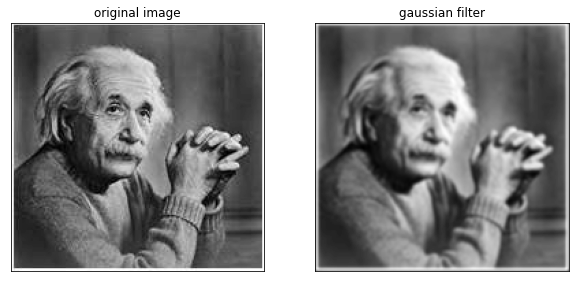

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]);

plt.subplot(122)
plt.imshow(gaussian_filter, cmap='gray')
plt.title('gaussian filter');
plt.xticks([]), plt.yticks([]);

## **اعمال فیلتر گاوسی روی نویز نمک و فلفل**

In [ ]:
gaussian_noised_filter = convolution(sp_img,gaussian_kernel)
gauss_filter5 = cv.GaussianBlur(noisy_img, (5,5), 0)
gauss_filter3 = cv.GaussianBlur(noisy_img, (3, 3), 0)

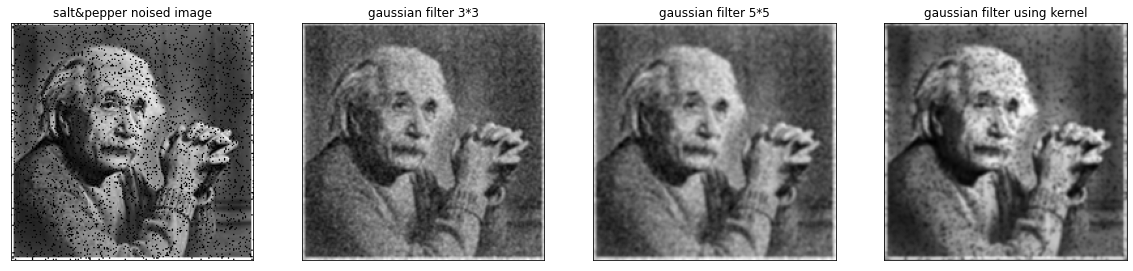

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(141)
plt.imshow(sp_img, cmap='gray')
plt.title('salt&pepper noised image')
plt.xticks([]), plt.yticks([]);

plt.subplot(142)
plt.imshow(gauss_filter3, cmap='gray')
plt.title('gaussian filter 3*3');
plt.xticks([]), plt.yticks([]);

plt.subplot(143)
plt.imshow(gauss_filter5, cmap='gray')
plt.title('gaussian filter 5*5');
plt.xticks([]), plt.yticks([]);

plt.subplot(144)
plt.imshow(gaussian_noised_filter, cmap='gray')
plt.title('gaussian filter using kernel');
plt.xticks([]), plt.yticks([]);

***اعمال فیلتر گاوسی روی نویز گاوسی***

In [ ]:
gauss1_filter5 = cv.GaussianBlur(noisy_img, (5,5), 0)
gauss1_filter3 = cv.GaussianBlur(noisy_img, (3, 3), 0)
gaussian_noised_filter1 = convolution(noisy_img ,gaussian_kernel)

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(141)
plt.imshow(noisy_img, cmap='gray');
plt.title('Gaussian noisy image')
plt.xticks([]), plt.yticks([]);

plt.subplot(142)
plt.imshow(gauss1_filter3, cmap='gray')
plt.title('gaussian filter 3*3')
plt.xticks([]), plt.yticks([]);

plt.subplot(143)
plt.imshow(gauss1_filter5, cmap='gray')
plt.title('gaussian filter 5*5');
plt.xticks([]), plt.yticks([]);

plt.subplot(144)
plt.imshow(gaussian_noised_filter1, cmap='gray')
plt.title('gaussian filter using Kernel');
plt.xticks([]), plt.yticks([]);

# **Sharpening Filters**

# آشکارسازی لبه

**Sobel Mask**

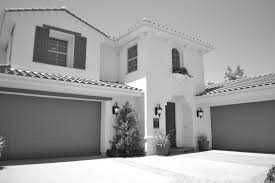

In [ ]:
img_house = cv.imread('/content/drive/MyDrive/image_notebooks/house.jfif', 0)
cv2_imshow(img_house)

In [ ]:
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
sobel_y = np.array([[-1,-2,-1], 
                    [0, 0, 0], 
                    [1, 2, 1]])

In [ ]:
sobel_mask_y= convolution(img_house, sobel_y)
sobel_mask_x= convolution(img_house, sobel_x)

In [ ]:
x= sobel_mask_x.ravel()
y= sobel_mask_y.ravel()
xy= np.sqrt(x^2 + y^2)
result_xy = np.reshape(xy, sobel_mask_x.shape).astype('uint8')

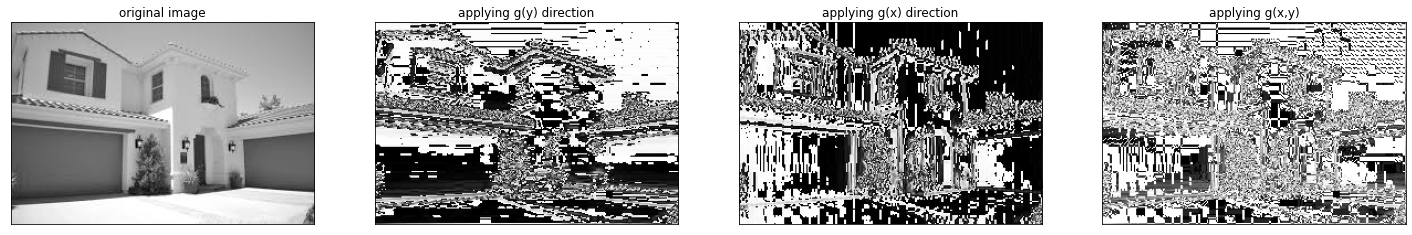

In [ ]:
plt.figure(figsize=(25, 25))

plt.subplot(141)
plt.imshow(img_house, cmap='gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]);

plt.subplot(142)
plt.imshow(sobel_mask_y, cmap='gray')
plt.title('applying g(y) direction');
plt.xticks([]), plt.yticks([]);

plt.subplot(143)
plt.imshow(sobel_mask_x, cmap='gray')
plt.title('applying g(x) direction');
plt.xticks([]), plt.yticks([]);

plt.subplot(144)
plt.imshow(result_xy, cmap= 'gray')
plt.title('applying g(x,y)');
plt.xticks([]), plt.yticks([]);

**ماتریس زاویه لبه‌ها**

In [ ]:
x_f= x.astype('float64')
# print(x_f)
print(x_f.min())
print(x_f.max())

0.0
255.0


In [ ]:
y_f= y.astype('float64')
# print(y_f)
print(y_f.min())
print(y_f.max())

0.0
255.0


In [ ]:
normalized_x =np.array((x_f - x_f.min() ) / (x_f.max() - x_f.min()), dtype= 'float64') 

print('min = ', normalized_x.min())
print()

print('max = ', normalized_x.max())
print('===============================================================')

# print(normalized_x[300:400])

min =  0.0

max =  1.0


In [ ]:
normalized_y =np.array((y_f - y_f.min() ) / (y_f.max() - y_f.min()), dtype= 'float64') 


print('min = ', normalized_y.min())
print()

print('max = ', normalized_y.max())
print('===============================================================')

# print(normalized_y[300:400])

min =  0.0

max =  1.0


In [ ]:
teta= np.arctan2(normalized_y, normalized_x)

print('min = ', teta.min())
print()

print('max = ', teta.max())
print('===============================================================')
print(teta[250:400])

min =  0.0

max =  1.5707963267948966
[1.55066482 1.56417391 1.551191   1.5514439  1.57079633 1.53895995
 1.53331389 1.56466143 1.57079633 1.55261651 1.55283419 1.57079633
 1.55889213 1.51821327 1.5312689  1.55968567 1.55422326 1.5653319
 1.55992719 1.55458153 1.56544878 1.55492464 1.55509081 1.57079633
 0.42662749 0.98736826 0.78539816 0.78539816 0.78938221 0.79339799
 0.78938221 0.78539816 0.78144561 1.57079633 0.78144561 0.78539816
 0.78144561 0.78144561 0.78539816 0.78144561 0.78938221 0.78938221
 0.78144561 0.78144561 0.78144561 0.78539816 0.78144561 0.78144561
 0.8015258  0.79744577 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 0.77733382 0.75235235 1.57079633 1.57079633
 1.57079633 1.57079633 1.57079633 1.57079633 0.73605553 0.76482493
 0.79366244 0.80179014 0.78939814 1.54291511 1.50636949 1.5053163
 1.54175885 0.76907308 0.79784565 0.81018647 0.79749435 1.5588447
 1.51440457 1.5053163  1.56661225 0.76482493 0.78141412 0.06340695
 0.14079452 1.54857776 1.47

**Laplacian Filter**
برای تیز کردن تصویر

In [ ]:
laplacian = np.array([[0, 1, 0], 
                      [1, -4, 1], 
                      [0, 1, 0]])

laplace_result= convolution(img_house, laplacian)

In [ ]:
laplacian1 = np.array([[-1, -1, -1],
                       [-1, 8, -1],
                       [-1, -1, -1]])

laplace_result1= convolution(img_house, laplacian1)

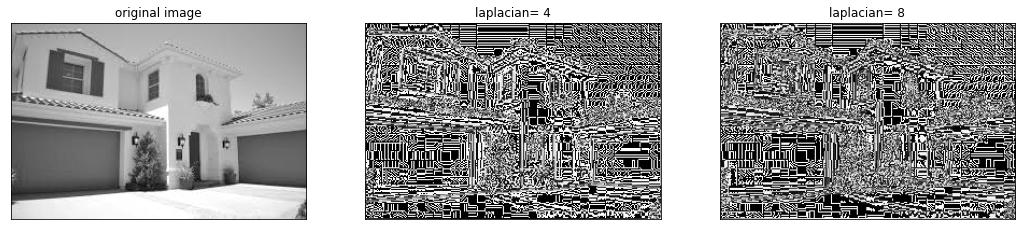

In [ ]:
plt.figure(figsize=(18, 18))

plt.subplot(131)
plt.imshow(img_house, cmap='gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]);

plt.subplot(132)
plt.imshow(laplace_result, cmap='gray')
plt.title('laplacian= 4');
plt.xticks([]), plt.yticks([]);


plt.subplot(133)
plt.imshow(laplace_result1, cmap='gray')
plt.title('laplacian= 8')
plt.xticks([]), plt.yticks([]);

***Prewitt Mask***

In [ ]:
prewitt_x = np.array([[-1, 0, 1], 
                      [-1, 0, 1], 
                      [-1, 0, 1]])
prewitt_y = np.array([[-1,-1,-1], 
                      [0, 0, 0 ], 
                      [1, 1, 1 ]])

In [ ]:
prewitt_result_x= convolution(img_house, prewitt_x)
prewitt_result_y= convolution(img_house, prewitt_y)

In [ ]:
pre_x= prewitt_result_x.ravel()
pre_y= prewitt_result_y.ravel()
pre_xy= np.sqrt(pre_x^2 + pre_y^2)
pre_result = np.reshape(pre_xy, prewitt_result_x.shape).astype('uint8')

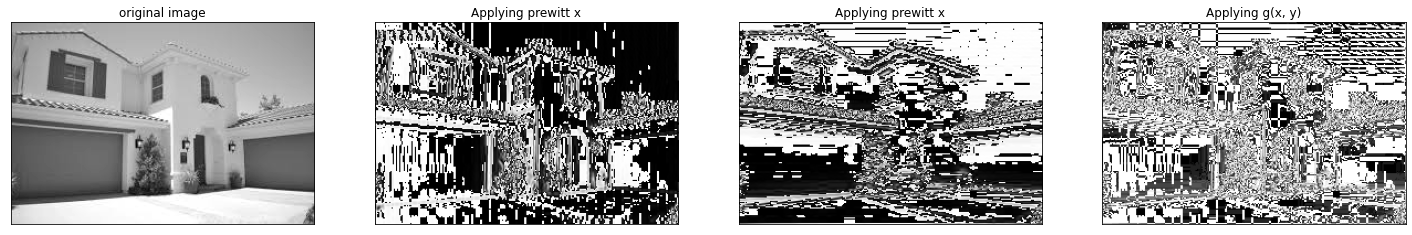

In [ ]:
plt.figure(figsize=(25, 25))

plt.subplot(141)
plt.imshow(img_house, cmap='gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]);

plt.subplot(142)
plt.imshow(prewitt_result_x, cmap='gray')
plt.title('Applying prewitt x');
plt.xticks([]), plt.yticks([]);


plt.subplot(143)
plt.imshow(prewitt_result_y, cmap='gray')
plt.title('Applying prewitt x')
plt.xticks([]), plt.yticks([]);

plt.subplot(144)
plt.imshow(pre_result, cmap='gray')
plt.title('Applying g(x, y)')
plt.xticks([]), plt.yticks([]);

**ماتریس زاویه لبه**

In [ ]:
pre_x_f= pre_x.astype('float64')

print('min = ', pre_x_f.min())
print()
print('max = ', pre_x_f.max())

print('=========================================================')
# print(pre_x_f)


min =  0.0

max =  255.0


In [ ]:
pre_y_f= pre_y.astype('float64')

print('min = ' , pre_y_f.min())
print()
print('max = ', pre_y_f.max())

print('=========================================================')
# print(pre_y_f)

min =  0.0

max =  255.0


In [ ]:
normalized_pre_x_f =np.array((pre_x_f - pre_x_f.min() ) / (pre_x_f.max() - pre_x_f.min()), dtype= 'float64') 

print('min normalized x = ', normalized_pre_x_f.min())
print()
print('max normalized x = ',normalized_pre_x_f.max())

print('==========================================================')

# print(normalized_pre_x_f[300:500])

min normalized x =  0.0

max normalized x =  1.0


In [ ]:
normalized_pre_y_f =np.array((pre_y_f - pre_y_f.min() ) / (pre_y_f.max() - pre_y_f.min()), dtype= 'float64') 

print('min normalized y = ', normalized_pre_y_f.min())
print()
print('max normalized y = ',normalized_pre_y_f.max())

print('==========================================================')

# print(normalized_pre_y_f[200: 400])

min normalized y =  0.0

max normalized y =  1.0


In [ ]:
teta1= np.arctan2(normalized_pre_y_f, normalized_pre_x_f)
print('min teta = ', teta1.min())
print()
print('max teta = ', teta.max())

print('==========================================================')

print(teta1[300:450])

min teta =  0.0

max teta =  1.5707963267948966
[1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 0.77537846 0.76308949 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 0.75092906 0.76913943 0.79150807 0.79754332
 0.78738623 1.55095766 1.52283314 1.5222515  1.550391   0.77330198
 0.79356125 0.80372605 0.79339799 1.56285999 1.53081764 1.5222515
 1.56668112 0.77325301 0.78539816 0.0475831  0.1024073  1.57079633
 1.47432255 1.40564765 0.03173537 0.80572057 0.78539816 1.56661225
 1.47405286 1.49146526 0.79549883 0.04842027 1.57079633 0.5880026
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.79131525 0.78935071 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 